# SVM 多クラス分類，Iris

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from sklearn.svm import SVC
#from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

from mlxtend.plotting import plot_decision_regions #決定領域のプロット，外部ライブラリを利用

FLAG_fig = False

irisデータのうち，sepal（がく）と petal（花びら）の長さ[cm]によるクラス分類を行う。  
iris.dataの0番目と2番目の要素だけを抽出してXの配列(150 x 2)に格納    
クラス(花びらの種類 0:Iris-Setosa, 1:Iris-Versicolour, 2:Iris-Virginica)を y(150 x 1)に格納

In [2]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [22]:
y[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

ガウシアンカーネルで ovr(one-vs-rest) と ovo(one-vs-one) の比較を行う  
ディフォルトで decision_function_shape='ovr'であるが，敢えて明示的に指定

In [4]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovr').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5)
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



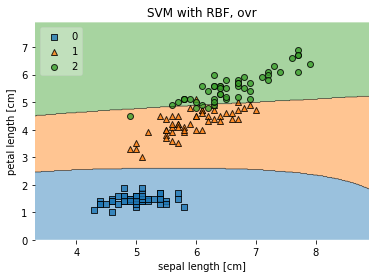

In [5]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovr')
plt.show()

decision_function_shape='ovo'とする

In [6]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5, decision_function_shape='ovo')
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



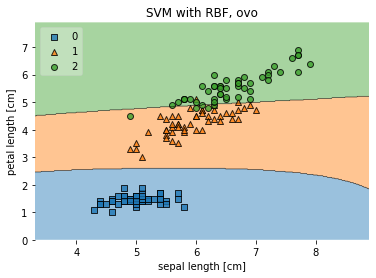

In [7]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovo')
plt.show()

ovrとovoとで，あまり差がないことが認められた

次に，グリッドサーチを用いて，irisデータに対する最良のクラス分類器を求める

In [8]:
# グリッドサーチ用パラメータを設定
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}
svm = SVC()

In [9]:
# グリッドサーチを実行
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5) #交差検証のデータ分割を5とした
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

In [10]:
# 最良パラメータを表示
print('Best accuracy =', clf.best_score_)
print(clf.best_params_)

Best accuracy = 0.9666666666666668
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 10.0, 'kernel': 'poly'}


多項式カーネルで，  
decision_function_shape='ovo'の方が'ovr'よりも識別精度が高い結果を得た

Accuracy = 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



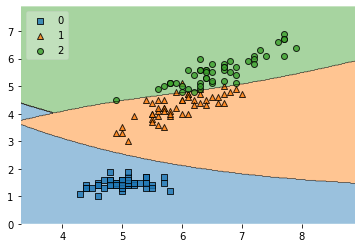

In [11]:
# 最適パラメータによる識別器を全データに適用，テストデータは後述
bst_clf = clf.best_estimator_
y_est = bst_clf.predict(X)
print('Accuracy =', accuracy_score(y, y_est))
print(classification_report(y, y_est))
plot_decision_regions(X,y, clf=bst_clf, res=0.02, legend=2)
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_01.png')
plt.show()

上記のグラフを見て，分類する決定領域が複雑すぎて使いにくいと感じたら，決定領域線を直線で構成する線形カーネルも試してみてください

#### 4つの説明変数を用いる
SVCのパラメータの決め方は，本来ならば改めてGridSearchを適用するところであるが，ここでは，上のGrid Searchの結果に従う。

In [12]:
X = iris.data
y = iris.target
clf = SVC(C=0.1, kernel='poly', gamma=10.0, decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.1, decision_function_shape='ovo', gamma=10.0, kernel='poly')
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



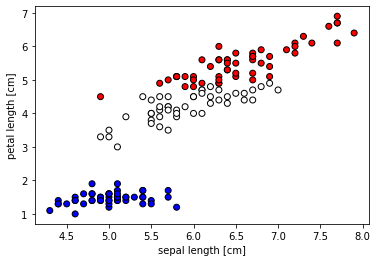

In [13]:
plt.scatter(X[:,0],X[:,2], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_02.png')
plt.show()

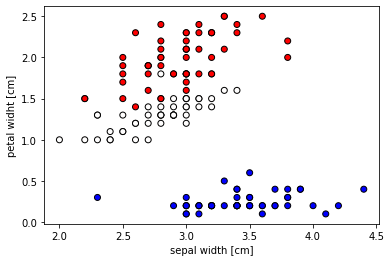

In [14]:
plt.scatter(X[:,1],X[:,3], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal widht [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_03.png')
plt.show()